In [23]:
import pandas as pd
import seaborn as sns
import pickle as pkl

In [26]:
with open('data/MBP_data_15_22.pkl', 'rb') as f:
    data_dict = pkl.load(f)

In [5]:
for year, df in data_dict.items():
    df['model_year'] = year
mbp_data = pd.concat([df for df in data_dict.values()])
mbp_data = mbp_data.reset_index(drop=True)

In [6]:
condition_dict = {
    'Brand New': 'condition_new',
    'Open Box': 'condition_like_new',
    'Certified - Refurbished': 'condition_refurbished_0',
    'Excellent - Refurbished': 'condition_refurbished_1',
    'Very Good - Refurbished': 'condition_refurbished_2',
    'Good - Refurbished': 'condition_refurbished_3',
    'Refurbished': 'condition_refurbished_4',
    'Pre-Owned': 'condition_used'
}
mbp_data['condition'] = None
for condition_tag, col_name in condition_dict.items():
    mbp_data[col_name] = 0
    condition_subset = mbp_data['tags'].apply(lambda tags: condition_tag in tags)
    mbp_data.loc[condition_subset, 'condition'] = col_name
    mbp_data.loc[condition_subset, col_name] = 1

In [12]:
# Filtering
mbp_data_filt = mbp_data.loc[~mbp_data['seller_name'].isnull()]

<AxesSubplot:xlabel='price', ylabel='Density'>

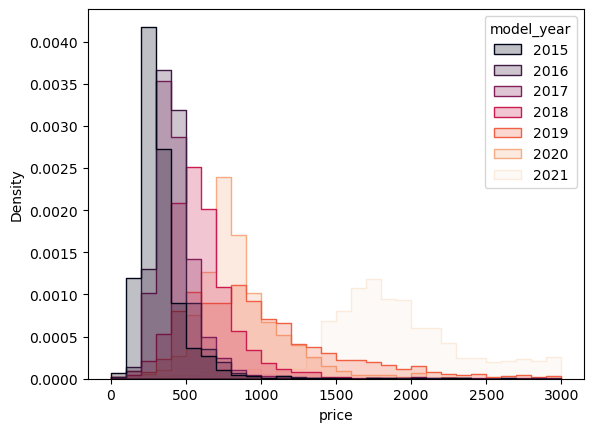

In [28]:
sns.histplot(
    mbp_data_filt, 
    x='price', 
    stat='density',
    common_norm=False,
    binrange=[0,3000], 
    binwidth=100,
    element='step',
    hue='model_year', 
    palette=sns.color_palette("rocket", as_cmap=True))

In [29]:
mbp_data_agg = mbp_data_filt.groupby(['model_year', 'condition']).agg({'price':['min', 'max', 'mean', 'count']})
mbp_data_agg.columns = ['_'.join(col) for col in mbp_data_agg.columns.values]
mbp_data_agg = mbp_data_agg.reset_index()

<AxesSubplot:xlabel='model_year', ylabel='price_mean'>

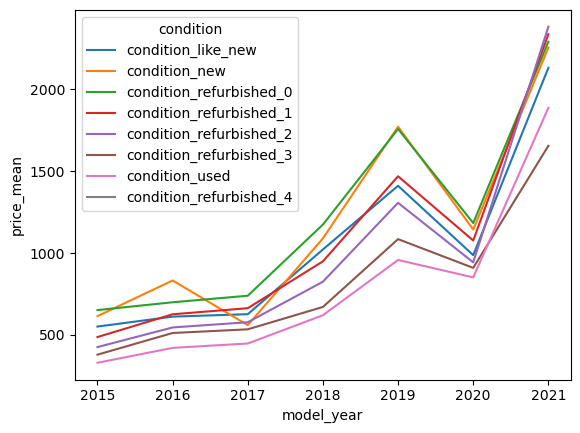

In [30]:
sns.lineplot(data=mbp_data_agg, x='model_year', y='price_mean', hue='condition')

In [35]:
def cost_per_year(row):
    year = row['model_year']
    price = row['price_mean']
    remaining_years = year - 2015 + 2
    mean_price_per_year = price/remaining_years
    return mean_price_per_year

mbp_data_agg['mean_price_per_year'] = mbp_data_agg.apply(cost_per_year, axis=1)

<AxesSubplot:xlabel='model_year', ylabel='mean_price_per_year'>

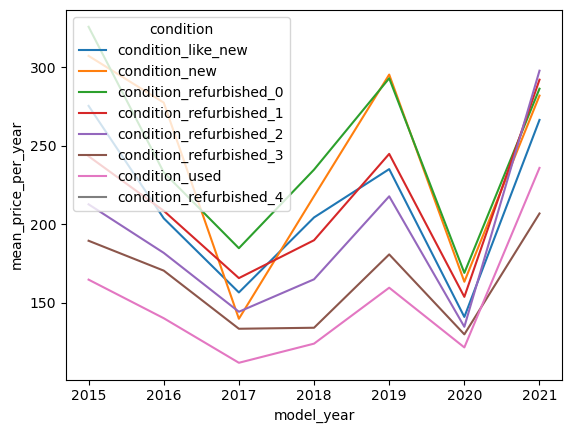

In [37]:
sns.lineplot(data=mbp_data_agg, x='model_year', y='mean_price_per_year', hue='condition')